トヨタ車をクラスタリング

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
pd.options.display.float_format = '{:.2f}'.format

In [134]:
df = pd.read_csv("/content/drive/MyDrive/2024/技術計画/data/クルママスタ.csv")
df = df.dropna().reset_index(drop=True)
df.head()

,carname,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model
0,aqua,1997000,2598000.00,13.00,3.00,1.00,29.30,4050.00,1695.00,1485.00,1830.00,1425.00,1190.00,5.00,1.50,4.90,compact
1,corollasport,2200000,2890000.00,9.00,3.00,2.00,27.20,4375.00,1790.00,1460.00,1795.00,1510.00,1155.00,5.00,1.80,5.10,compact
2,new-corolla,1990000,2998000.00,5.00,2.00,2.00,25.30,4495.00,1745.00,1435.00,1830.00,1510.00,1160.00,5.00,1.50,5.00,compact
3,yaris,1501000,2694000.00,11.00,2.00,2.00,30.20,3950.00,1695.00,1495.00,1845.00,1430.00,1190.00,5.00,1.00,4.80,compact
4,roomy,1566500,2100000.00,10.00,1.00,1.00,16.80,3705.00,1670.00,1735.00,2180.00,1480.00,1355.00,5.00,1.00,4.60,compact


In [135]:
df.columns

Index(['carname', 'min_cost', 'max_cost', 'body_color_cnt',
       'interior_color_cnt', 'engine_type_cnt', 'min_mileage', 'body_l',
       'body_w', 'body_h', 'indoor_l', 'indoor_w', 'indoor_h', 'passenger_num',
       'min_displacement', 'min_mrr', 'model'],
      dtype='object')

In [136]:
# 型変換
for col in df.columns[1:]:
    if col == "min_mileage" or col == "min_displacement" or col == "min_mrr":
        df[col] = df[col].astype(float)
    elif col == "carname":
        df[col] = df[col].astype(str)
    elif col == "model":
        df[col] = df[col].astype("category")
    else:
        df[col] = df[col].astype(int)

In [137]:
df.dtypes

carname                 object
min_cost                 int64
max_cost                 int64
body_color_cnt           int64
interior_color_cnt       int64
engine_type_cnt          int64
min_mileage            float64
body_l                   int64
body_w                   int64
body_h                   int64
indoor_l                 int64
indoor_w                 int64
indoor_h                 int64
passenger_num            int64
min_displacement       float64
min_mrr                float64
model                 category
dtype: object

In [138]:
# EDA
df.describe()

,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,3745757.14,4945765.71,6.63,1.97,1.66,23.31,4517.43,1785.43,1616.71,2096.29,1508.43,1222.43,5.26,2.01,5.19
std,3336920.54,3398898.31,2.67,1.18,0.59,22.43,493.03,113.94,235.93,569.90,98.37,107.57,1.42,1.09,0.78
min,860200.00,1364000.00,2.00,1.00,1.00,8.00,3395.00,1475.00,1280.00,910.00,1250.00,1040.00,2.00,0.00,1.50
25%,1990000.00,2944000.00,5.00,1.00,1.00,13.00,4262.50,1712.50,1460.00,1817.50,1435.00,1160.00,5.00,1.50,4.95
50%,2750000.00,3960000.00,6.00,2.00,2.00,21.60,4495.00,1790.00,1500.00,1890.00,1510.00,1200.00,5.00,1.80,5.20
75%,4897500.00,5916500.00,8.00,2.00,2.00,25.30,4900.00,1865.00,1785.00,2350.00,1550.00,1255.00,5.00,2.50,5.55
max,20080000.00,20080000.00,13.00,7.00,3.00,146.00,5380.00,1980.00,2285.00,3525.00,1735.00,1565.00,10.00,5.70,6.30


In [139]:
# 車型別
df.groupby("model").mean()

<ipython-input-139-80e8c7e29ec3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr
model,,,,,,,,,,,,,,,
century,20080000.00,20080000.00,4.00,7.00,1.00,12.40,5335.00,1930.00,1505.00,2165.00,1605.00,1185.00,5.00,5.00,5.90
compact,1850900.00,2656000.00,9.60,2.20,1.60,25.76,4115.00,1719.00,1522.00,1896.00,1471.00,1210.00,5.00,1.36,4.88
kei,860200.00,1364000.00,7.00,1.00,1.00,23.20,3395.00,1475.00,1500.00,2025.00,1345.00,1240.00,4.00,0.66,4.40
mini-ban,4146800.00,5624171.43,5.29,2.00,1.71,17.20,4902.86,1815.00,1948.57,2997.14,1602.86,1383.57,7.00,2.21,5.51
sedan,3421520.00,4613400.00,6.00,1.60,1.60,49.48,4676.00,1789.00,1448.00,1886.00,1514.00,1162.00,5.00,2.30,4.50
sport,3638640.00,4626840.00,6.00,2.00,1.00,13.46,4089.00,1754.00,1364.00,1435.00,1426.00,1098.00,3.40,1.63,5.18
suv,3638888.89,5269888.89,7.22,1.67,2.11,18.20,4640.56,1847.78,1703.89,2041.67,1514.44,1218.33,5.44,2.18,5.57
wagon,1914200.00,2689200.00,5.50,1.50,2.00,26.35,4447.50,1720.00,1467.50,1870.00,1470.00,1180.00,5.00,1.50,4.95


In [140]:
col_list = ['carname', 'mean_cost', 'min_mileage','body_l','body_w','body_h',
            'indoor_l','indoor_w','indoor_h','passenger_num','min_displacement','min_mrr','model']

In [50]:
# 特徴量設計
# 平均価格
df["mean_cost"] = df[["min_cost", "max_cost"]].mean(axis=1)
t_df = df[col_list]
t_df.head()

,carname,mean_cost,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model
0,aqua,2297500.00,29.30,4050,1695,1485,1830,1425,1190,5,1.50,4.90,compact
1,corollasport,2545000.00,27.20,4375,1790,1460,1795,1510,1155,5,1.80,5.10,compact
2,new-corolla,2494000.00,25.30,4495,1745,1435,1830,1510,1160,5,1.50,5.00,compact
3,yaris,2097500.00,30.20,3950,1695,1495,1845,1430,1190,5,1.00,4.80,compact
4,roomy,1833250.00,16.80,3705,1670,1735,2180,1480,1355,5,1.00,4.60,compact


In [51]:
t_df.iloc[0:3,1:-2]

,mean_cost,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement
0,2297500.00,29.30,4050,1695,1485,1830,1425,1190,5,1.50
1,2545000.00,27.20,4375,1790,1460,1795,1510,1155,5,1.80
2,2494000.00,25.30,4495,1745,1435,1830,1510,1160,5,1.50


In [52]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = "random"
random_state = 2018

tSNE = TSNE(n_components = n_components,
            learning_rate = learning_rate,
            perplexity=perplexity,
            early_exaggeration = early_exaggeration,
            init = init,
            random_state = random_state)

X_train_tSNE = tSNE.fit_transform(t_df.iloc[:,1:-2])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE)

# scatterPlot(X_train_tSNE)

Text(0.5, 1.0, 'Separation of Observations using tSNE')

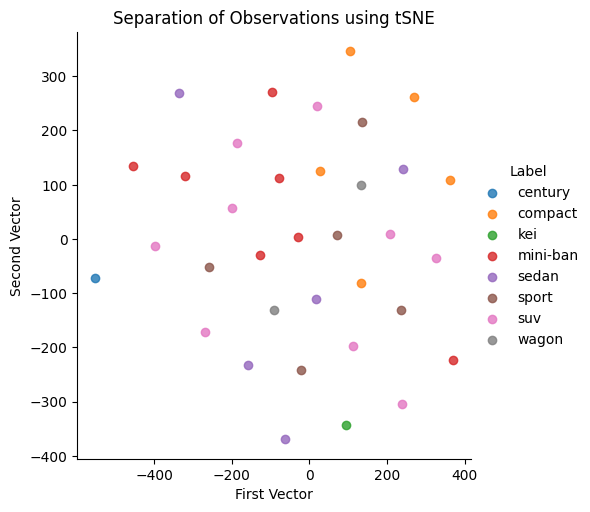

In [53]:
result_df = pd.concat((X_train_tSNE, df["model"]), axis=1, join="inner")
result_df.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=result_df, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations using " + "tSNE")

In [118]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 2
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(t_df.iloc[:,1:-2])
X_train_PCA = pd.DataFrame(data=X_train_PCA)
X_train_PCA.head()

,0,1
0,-2048261.47,-340.28
1,-1800761.44,-239.57
2,-1851761.43,-164.26
3,-2248261.48,-354.54
4,-2512511.49,-68.72


In [119]:
# k-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 5
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[], index=range(2,21),
                              columns=["inertia"])
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init,
                    max_iter=max_iter, tol=tol, random_state=random_state)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:, 0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_

<Axes: >

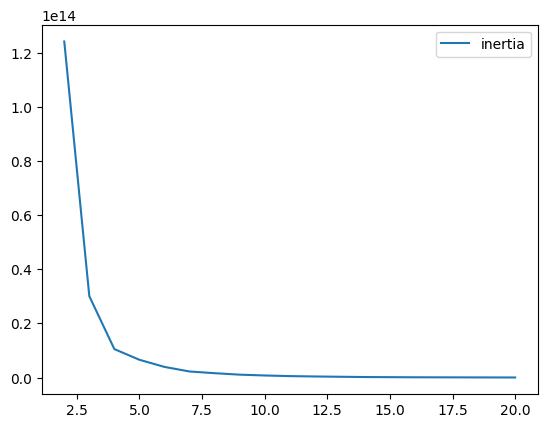

In [120]:
kMeans_inertia.plot()

In [121]:
# クラスタリング結果の評価
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = pd.DataFrame(data=clusterDF["cluster"].value_counts())
    countByCluster.reset_index(inplace=True, drop=False)
    countByCluster.columns = ['cluster', 'clusterCount']
    preds = pd.concat([labelsDF, clusterDF], axis=1)
    preds.columns = ['trueLabel', 'cluster']

    countByLabel = pd.DataFrame(data=preds.groupby("trueLabel").count())

    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True, drop=False)
    countMostFreq.columns = ['cluster', 'countMostFrequent']

    accuracyDF = countMostFreq.merge(countByCluster, left_on="cluster", right_on='cluster')
    overallAccuracy = accuracyDF.countMostFrequent.sum() / accuracyDF.clusterCount.sum()

    accuracyByLabel = accuracyDF.countMostFrequent / accuracyDF.clusterCount

    return countByCluster, countByLabel, countMostFreq, accuracyDF, overallAccuracy, accuracyByLabel, preds, countByCluster


In [122]:
n_clusters = 2
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[], index=range(2,21),
                              columns=["inertia"])
overallAccuracy_kMeansDF = pd.DataFrame(data=[], index=range(2,21), columns=['overallAccuracy'])

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init,
                    max_iter=max_iter, tol=tol, random_state=random_state)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:, 0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_

    X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:, 0:cutoff])
    X_train_kmeansClustered = pd.DataFrame(data=X_train_kmeansClustered, columns=['cluster'])

    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
    accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans, preds, countByCluster\
    = analyzeCluster(X_train_kmeansClustered, df["model"])

    overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans


<Axes: >

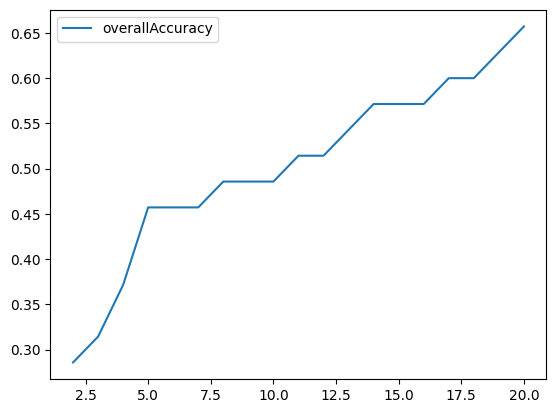

In [123]:
# Plot accuracy
overallAccuracy_kMeansDF.plot()

In [125]:
# k-means
kmeans = KMeans(n_clusters=8, n_init=n_init,
                max_iter=max_iter, tol=tol, random_state=random_state)

cutoff = 99
kmeans.fit(X_train_PCA.loc[:, 0:cutoff])
kMeans_inertia.loc[n_clusters] = kmeans.inertia_

df["cls"] = kmeans.predict(X_train_PCA.loc[:, 0:cutoff])
X_train_PCA['cls'] = kmeans.predict(X_train_PCA.loc[:, 0:cutoff])
df

,carname,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model,mean_cost,cls
0,aqua,1997000,2598000,13,3,1,29.30,4050,1695,1485,1830,1425,1190,5,1.50,4.90,compact,2297500.00,7
1,corollasport,2200000,2890000,9,3,2,27.20,4375,1790,1460,1795,1510,1155,5,1.80,5.10,compact,2545000.00,7
2,new-corolla,1990000,2998000,5,2,2,25.30,4495,1745,1435,1830,1510,1160,5,1.50,5.00,compact,2494000.00,7
3,yaris,1501000,2694000,11,2,2,30.20,3950,1695,1495,1845,1430,1190,5,1.00,4.80,compact,2097500.00,3
4,roomy,1566500,2100000,10,1,1,16.80,3705,1670,1735,2180,1480,1355,5,1.00,4.60,compact,1833250.00,3
5,alphard,5400000,8720000,3,2,2,16.50,4995,1850,1935,3005,1660,1360,7,2.50,5.90,mini-ban,7060000.00,2
6,vellfire,6550000,8920000,2,2,2,16.50,4995,1850,1945,3005,1660,1360,7,2.40,5.90,mini-ban,7735000.00,5
7,voxy,3090000,3960000,6,1,2,22.00,4695,1730,1895,2805,1470,1405,7,1.80,5.50,mini-ban,3525000.00,0
8,granace,6421000,6721000,4,4,1,10.00,5300,1970,1990,3290,1735,1290,6,2.80,5.60,mini-ban,6571000.00,2
9,sienta,1950000,3108000,9,3,2,25.30,4260,1695,1695,2545,1530,1300,5,1.50,5.00,mini-ban,2529000.00,7


In [131]:
X_train_PCA["car_name"] = df["carname"]

In [133]:
import plotly.express as px
fig = px.scatter(X_train_PCA, x=0, y=1, color='cls', hover_data=['car_name'])
fig.show()

## K-node

In [141]:
!pip install kmodes

In [143]:
df.head()

,carname,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model
0,aqua,1997000,2598000,13,3,1,29.30,4050,1695,1485,1830,1425,1190,5,1.50,4.90,compact
1,corollasport,2200000,2890000,9,3,2,27.20,4375,1790,1460,1795,1510,1155,5,1.80,5.10,compact
2,new-corolla,1990000,2998000,5,2,2,25.30,4495,1745,1435,1830,1510,1160,5,1.50,5.00,compact
3,yaris,1501000,2694000,11,2,2,30.20,3950,1695,1495,1845,1430,1190,5,1.00,4.80,compact
4,roomy,1566500,2100000,10,1,1,16.80,3705,1670,1735,2180,1480,1355,5,1.00,4.60,compact


In [148]:
df.dtypes

carname                 object
min_cost                 int64
max_cost                 int64
body_color_cnt           int64
interior_color_cnt       int64
engine_type_cnt          int64
min_mileage            float64
body_l                   int64
body_w                   int64
body_h                   int64
indoor_l                 int64
indoor_w                 int64
indoor_h                 int64
passenger_num            int64
min_displacement       float64
min_mrr                float64
model                 category
dtype: object

In [161]:
t_df.head()

,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model,cls
0,1997000,2598000,13,3,1,29.30,4050,1695,1485,1830,1425,1190,5,1.50,4.90,compact,3
1,2200000,2890000,9,3,2,27.20,4375,1790,1460,1795,1510,1155,5,1.80,5.10,compact,3
2,1990000,2998000,5,2,2,25.30,4495,1745,1435,1830,1510,1160,5,1.50,5.00,compact,3
3,1501000,2694000,11,2,2,30.20,3950,1695,1495,1845,1430,1190,5,1.00,4.80,compact,3
4,1566500,2100000,10,1,1,16.80,3705,1670,1735,2180,1480,1355,5,1.00,4.60,compact,3


In [177]:
X_train_PCA["model"] = df["model"]
X_train_PCA = X_train_PCA[[0, 1, "model"]]
X_train_PCA

,0,1,model
0,-2048261.47,-340.28,compact
1,-1800761.44,-239.57,compact
2,-1851761.43,-164.26,compact
3,-2248261.48,-354.54,compact
4,-2512511.49,-68.72,compact
5,2714238.64,901.09,mini-ban
6,3389238.63,856.11,mini-ban
7,-820761.39,822.19,mini-ban
8,2225238.68,1328.29,mini-ban
9,-1816761.43,413.33,mini-ban


In [180]:
import numpy as np
from kmodes.kprototypes import KPrototypes

# t_df = df.iloc[:, 1:]
t_df = X_train_PCA.copy()
syms = df['carname']
kproto = KPrototypes(n_clusters=6, init='Cao', verbose=2)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [181]:
clusters = kproto.fit_predict(t_df, categorical=[2])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

for s, c in zip(syms, clusters):
    print(f"Symbol: {s}, cluster:{c}")

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5, ncost: 7562783904561.083
Run: 1, iteration: 2/100, moves: 0, ncost: 7562783904561.083
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2, ncost: 5611132792483.774
Run: 2, iteration: 2/100, moves: 0, ncost: 5611132792483.774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 5728544009769.309
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 

In [172]:
df["cls"] = clusters

In [173]:
df

,carname,min_cost,max_cost,body_color_cnt,interior_color_cnt,engine_type_cnt,min_mileage,body_l,body_w,body_h,indoor_l,indoor_w,indoor_h,passenger_num,min_displacement,min_mrr,model,cls
0,aqua,1997000,2598000,13,3,1,29.30,4050,1695,1485,1830,1425,1190,5,1.50,4.90,compact,4
1,corollasport,2200000,2890000,9,3,2,27.20,4375,1790,1460,1795,1510,1155,5,1.80,5.10,compact,4
2,new-corolla,1990000,2998000,5,2,2,25.30,4495,1745,1435,1830,1510,1160,5,1.50,5.00,compact,4
3,yaris,1501000,2694000,11,2,2,30.20,3950,1695,1495,1845,1430,1190,5,1.00,4.80,compact,4
4,roomy,1566500,2100000,10,1,1,16.80,3705,1670,1735,2180,1480,1355,5,1.00,4.60,compact,4
5,alphard,5400000,8720000,3,2,2,16.50,4995,1850,1935,3005,1660,1360,7,2.50,5.90,mini-ban,3
6,vellfire,6550000,8920000,2,2,2,16.50,4995,1850,1945,3005,1660,1360,7,2.40,5.90,mini-ban,2
7,voxy,3090000,3960000,6,1,2,22.00,4695,1730,1895,2805,1470,1405,7,1.80,5.50,mini-ban,1
8,granace,6421000,6721000,4,4,1,10.00,5300,1970,1990,3290,1735,1290,6,2.80,5.60,mini-ban,2
9,sienta,1950000,3108000,9,3,2,25.30,4260,1695,1695,2545,1530,1300,5,1.50,5.00,mini-ban,4


In [183]:
X_train_PCA["cls"] = clusters
X_train_PCA["carname"] = df["carname"]

<ipython-input-183-5fa1bf7ff9e0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
import plotly.express as px
fig = px.scatter(X_train_PCA, x=0, y=1, color='cls', hover_data=['car_name'])
fig.show()

In [185]:
#
import plotly.express as px
fig = px.scatter(X_train_PCA, x=0, y=1, color='cls', hover_data=['carname', "model"])
fig.show()

In [186]:
#
import plotly.express as px
fig = px.scatter(X_train_PCA, x=0, y=1, color='model', hover_data=['carname', "model"])
fig.show()